# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Luciano Rizky Pratama
- **Email:** lulupratama60@gmail.com
- **ID Dicoding:** toorizky

## Mengkoneksikan collab dengan google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menentukan Pertanyaan Bisnis

- Pada tahun 2011 penyewaan sepeda paling banyak dan sedikit berada pada bulan?
- Perbandingan pemilihan registered dengan casual antara tahun 2011 dan 2012
- Korelasi antara windspeed dengan jumlah registered





## Import Semua Packages/Library yang Digunakan

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn


# Data Wrangling

## Gathering Data

In [62]:
#memuat dataset bikesharing yang berisi  2 file csv yaitu day dan hour yang telah dimasukan  ke drive
bikeDay_df = pd.read_csv("/content/drive/MyDrive/Dataset/day.csv")
bikeHour_df = pd.read_csv("/content/drive/MyDrive/Dataset/hour.csv")

In [63]:
#melihat 5 data teratas dari dataset bikeDay_df
bikeDay_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [64]:
#melihat 5 data teratas dari dataset bikeHour_df
bikeHour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### Tipe Data

In [65]:
# Memeriksa tipe data untuk kedua tabel
bikeDay_df.info()
bikeHour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

#### Terlihat dari pengecekan tersebut, terlihat semua tipe data yang dimiliki oleh tiap rows yang ada di dalam kedua dataset

### Missing Value

In [66]:
# Mengecek apakah terdapat missing value dalam dataset bikeDay_df
bikeDay_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [67]:
# Mengecek apakah terdapat missing value dalam dataset bikeHour_df
bikeHour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Dari hasil pengecekan tersebut menunjukan bahwa kedua dataset  tidak memiliki **Missing Values**

### Duplikasi Data

In [68]:
print("Jumlah duplikasi data sebanyak:", bikeDay_df.duplicated().sum())
print("Jumlah duplikasi data sebanyak:", bikeHour_df.duplicated().sum())

Jumlah duplikasi data sebanyak: 0
Jumlah duplikasi data sebanyak: 0


#### Dari hasil pengecekan tersebut menunjukan bahwa kedua dataset  tidak terdapat **duplikasi data**

### Deskripsi Statistik

In [69]:
# Mengecek deskripsi statistik dalam dataset bikeDay_df
bikeDay_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [70]:
# Mengecek deskripsi statistik dalam dataset bikeHour_df
bikeHour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Ada beberapa hal yang akan dilakukan dalam cleaning kedua dataset, antara lain :
- mengubah tipe data object pada kolom dteday menjadi tipe data datetime serta kolom years menjadi tipe data int
-mengubah tipe data object pada kolom years menjadi tipe data int
- mengubah tipe data int menjadi category utk kolom season, mnth, holiday, weekday, weathersit
- menghapus kolom istant dan workingday karena kolom instant tak memiliki korelasi yang signifkan, dan workingday dapat direpresentasikan oleh kolom weekday
- merubah nama kolom agar lebih mudah dibaca
- merubah beberapa value kolom dalam kolom agar lebih mudah dipahami
- membuat kolom baru untuk menunjukan hari yang ada termasuk weekdays atau weekend

In [71]:
# mengubah tipe data dteday "object" menjadi "datetime"
bikeDay_df['dteday'] = pd.to_datetime(bikeDay_df['dteday'])
bikeHour_df['dteday'] = pd.to_datetime(bikeHour_df['dteday'])

In [72]:
# mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
cols = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in cols:
    bikeDay_df[column] =  bikeDay_df[column].astype("category")
    bikeHour_df[column] =  bikeHour_df[column].astype("category")

In [73]:
#menghapus kolom istant dan workingday karena kolom instant tak memiliki korelasi yang signifkan, dan workingday dapat direpresentasikan oleh kolom weekday
bikeDay_df.drop(['instant','workingday'], axis = 1, inplace= True)
bikeHour_df.drop(['instant','workingday'], axis = 1, inplace= True)

In [74]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset bikeDay_df
bikeDay_df.rename(columns={'dteday': 'date','yr':'year',  'mnth':'month', 'weekday':'days_week', 'weathersit':'weather_situation','temp': 'temperature', 'hum':'humidity','windspeed':'wind_speed','cnt':'count_rentalbikes'},inplace=True)

In [75]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset bikeHour_df
bikeHour_df.rename(columns={'dteday': 'date','yr':'year', 'hr':'hours','mnth':'month', 'weekday':'days_week', 'weathersit':'weather_situation','temp': 'temperature', 'hum':'humidity','windspeed':'wind_speed','cnt':'count_rentalbikes'},inplace=True)

In [87]:
# mengubah tipe data years "object" menjadi "int"
bikeDay_df['year'] = pd.to_numeric(bikeDay_df['year'])
bikeHour_df['year'] = pd.to_numeric(bikeHour_df['year'])

In [77]:
# Merubah value season 1,2,3, 4 menjadi: Spring, Summer, Fall, Winter
bikeDay_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
bikeHour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# Merubah value month 1-12 menjadi: Jan-Des
bikeDay_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bikeHour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Merubah value weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_Snow 4:Heavy_Rain
bikeDay_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_snow','Heavy_rain'), inplace=True)
bikeHour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_snow','Heavy_rain'), inplace=True)

# Merubah value days 0-6 menjadi: sunday-saturday
bikeDay_df.days_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bikeHour_df.days_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Merubah value year menjadi: 0:2011, 1:2012
bikeDay_df.year.replace((0,1), ('2011','2012'), inplace=True)
bikeHour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Menghitung Humidity (value dibagi dengan 100)
bikeDay_df['humidity'] = bikeDay_df['humidity']/100
bikeHour_df['humidity'] = bikeHour_df['humidity']/100

Kita telah merubah beberapa nama rows dan value rows dengan keterangan yang ada dalam dataset bikesharing yang diperoleh melalui laman : [https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset](https://)

In [78]:
# Membuat kolom baru utk mengkategorikan hari termasuk weekday atau weekend
days_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(days_week):
    if days_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

bikeDay_df["category_days"] = bikeDay_df["days_week"].apply(get_category_days)
bikeHour_df["category_days"] = bikeHour_df["days_week"].apply(get_category_days)


## Exploratory Data Analysis (EDA)

### Explore Dataset bikeDay_df

In [88]:
# Melihat data statistik dari dataset bikeDay_df
bikeDay_df.describe(include="all")

<ipython-input-88-c7dc69a30ae6>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bikeDay_df.describe(include="all")


,date,season,year,month,holiday,days_week,weather_situation,temperature,atemp,humidity,wind_speed,casual,registered,count_rentalbikes,category_days
count,731,731,731.000000,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,731,4,NaN,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2011-01-01 00:00:00,Fall,NaN,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,1,188,NaN,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.006279,0.190486,848.176471,3656.172367,4504.348837,NaN
std,NaN,NaN,0.500342,NaN,NaN,NaN,NaN,0.183051,0.162961,0.001424,0.077498,686.622488,1560.256377,1937.211452,NaN
min,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.005200,0.134950,315.500000,2497.000000,3152.000000,NaN


#### berdasarkan data statistik diatas diperoleh informasi bahwa rata-rata jumlah penyewaan sepeda tiap harinya sekitar **4504** sepeda

In [89]:
# Melihat jumlah penyewaan sepeda tiap bulan berdasarkan status penyewa (registered or casual)
bikeDay_df.groupby(by="month").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
month,,
Jan,122891,12042
Feb,136389,14963
Mar,184476,44444
Apr,208292,60802
May,256401,75285
Jun,272436,73906
Jul,266791,78157
Aug,279155,72039


#### Berdasarkan hasil diatas, diperoleh informasi bahwa tiap bulannya penyewa casual lebih sedikit daripada penyewa yang sudah terdaftar

### Explore Dataset bikeHour_df

In [81]:
# Melihat data statistik dari dataset bikeHour_df
bikeHour_df.describe(include="all")

<ipython-input-81-75760cd69e4d>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bikeHour_df.describe(include="all")


,date,season,year,month,hours,holiday,days_week,weather_situation,temperature,atemp,humidity,wind_speed,casual,registered,count_rentalbikes,category_days
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,731,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2011-01-01 00:00:00,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,24,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.006272,0.190098,35.676218,153.786869,189.463088,NaN
std,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,0.192556,0.171850,0.001929,0.122340,49.305030,151.357286,181.387599,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.004800,0.104500,4.000000,34.000000,40.000000,NaN


#### berdasarkan data statistik diatas diperoleh informasi bahwa jumlah penyewa sekitar 1739 orang.

In [82]:
# Melihat jumlah penyewaan sepeda tiap bulan berdasarkan status penyewa (registered or casual)
bikeDay_df.groupby(by="month").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
month,,
Jan,122891,12042
Feb,136389,14963
Mar,184476,44444
Apr,208292,60802
May,256401,75285
Jun,272436,73906
Jul,266791,78157
Aug,279155,72039


In [83]:
# Melihat jumlah penyewaan berdasarkan jam
bikeHour_df.groupby(by="hours").agg({
    "count_rentalbikes": ["sum"]
})

,count_rentalbikes
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


#### Berdasarkan tabel diatas, diperoleh informasi bahwa penyewa paling banyak saat jam **17.00** dan yang paling sedikit terjadi saat jam **04.00**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada tahun 2011 penyewaan sepeda paling banyak dan sedikit berada pada bulan?

In [90]:
#Filter data tahun 2011
filtered_data = bikeDay_df[(bikeDay_df["year"] == 2011)]
# Melihat jumlah penyewaan sepeda tiap bulan di tahun 2011
monthly_rentals_2011 = filtered_data.groupby("month")["count_rentalbikes"].sum().reset_index()

# Cari bulan dengan jumlah penyewaan maksimum dan minimum
max_rental_month = monthly_rentals_2011[monthly_rentals_2011['count_rentalbikes'] == monthly_rentals_2011['count_rentalbikes'].max()]
min_rental_month = monthly_rentals_2011[monthly_rentals_2011['count_rentalbikes'] == monthly_rentals_2011['count_rentalbikes'].min()]

# Ambil nilai bulan dan jumlah penyewaan sepeda terbanyak
max_month_value = max_rental_month.iloc[0]["month"]
max_rentals_value = max_rental_month.iloc[0]["count_rentalbikes"]

# Ambil nilai bulan dan jumlah penyewaan sepeda terendah
min_month_value = min_rental_month.iloc[0]["month"]
min_rentals_value = min_rental_month.iloc[0]["count_rentalbikes"]

print("Penyewaan sepeda terbanyak di tahun 2011 berada di bulan:", max_month_value, ", dengan jumlah:", max_rentals_value, "penyewa.")
print("Penyewaan sepeda terendah di tahun 2011 berada di bulan:", min_month_value, ", dengan jumlah:", min_rentals_value, "penyewa.")



Penyewaan sepeda terbanyak di tahun 2011 berada di bulan: Jun , dengan jumlah: 143512 penyewa.
Penyewaan sepeda terendah di tahun 2011 berada di bulan: Jan , dengan jumlah: 38189 penyewa.


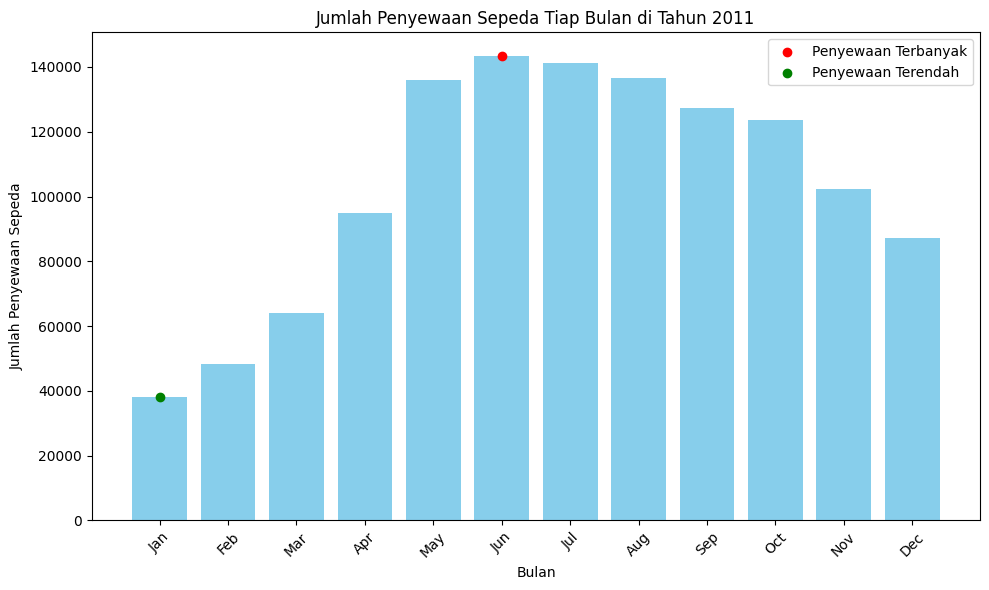

In [91]:
# Membuat plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_rentals_2011["month"], monthly_rentals_2011["count_rentalbikes"], color='skyblue')

# Menandai bulan dengan jumlah penyewaan maksimum dan minimum
plt.scatter(max_month_value, max_rentals_value, color='red', label='Penyewaan Terbanyak')
plt.scatter(min_month_value, min_rentals_value, color='green', label='Penyewaan Terendah')

# Menambahkan judul dan label
plt.title('Jumlah Penyewaan Sepeda Tiap Bulan di Tahun 2011')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Berdasarkan gambar diatas kita dapat mengetahui bahwa penyewaan sepeda terbanyak di tahun 2011 ada di bulan juni dengan jumlah **143512** penyewa dan penyewaan terendah berada di bulan januari dengan jumlah **38189** penyewa.

### Pertanyaan 2: Perbandingan pemilihan registered dengan casual antara tahun 2011 dan 2012

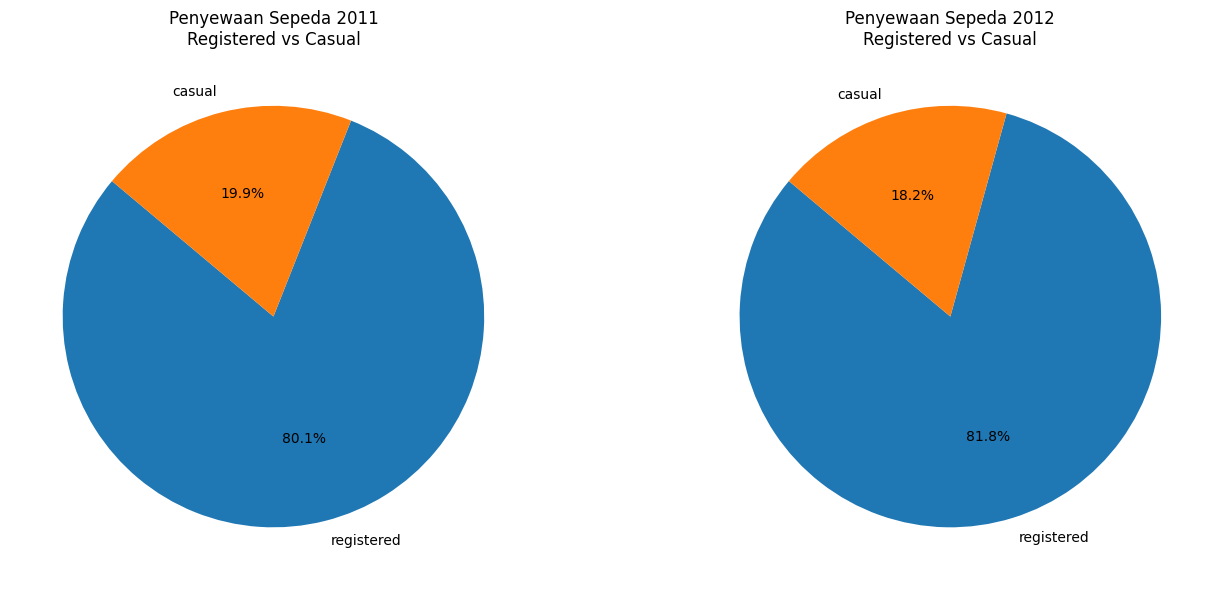

In [92]:
# Mengelompokkan data berdasarkan tahun dan menghitung jumlah penyewaan registered dan casual untuk setiap tahun
rentals_by_year = bikeDay_df.groupby("year").agg({
    "registered": "sum",
    "casual": "sum"
})

# Membuat pie chart
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Tahun 2011
ax[0].pie(rentals_by_year.loc[2011], labels=rentals_by_year.columns, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Penyewaan Sepeda 2011\nRegistered vs Casual')

# Tahun 2012
ax[1].pie(rentals_by_year.loc[2012], labels=rentals_by_year.columns, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Penyewaan Sepeda 2012\nRegistered vs Casual')

plt.tight_layout()
plt.show()
plt.show()

#### Dari gambar diatas dapat dilihat pada tahun 2011 penyewaan sepeda untuk kategori registered berjumlah 80.1% dan casual berjumlah 19.9% sedangkan pada tahun 2012 mengalami kenaikan untuk kategori registered yaitu 81.8% dan penurunan untuk kategori casual yaitu 18.2%

### Pertanyaan 3: Korelasi antara windspeed dengan jumlah registered

In [95]:
# Buat scatter plot dengan Plotly untuk memvisualisasikan hubungan suhu (temp) dengan jumlah penyewa registered
fig = px.scatter(bikeDay_df, x="wind_speed", y="registered", title="Hubungan Wind Speed dengan Jumlah Penyewa Registered")
fig.update_xaxes(title="Wind Speed")
fig.update_yaxes(title="Jumlah Penyewa Registered")
fig.show()

#### Disini kita menggunakan scatter plot untuk mengetahui korelasi antara wind speed dengan jumlah penyewa registered, dari hasil scatter plot diatas diperoleh informasi bahwa semakin kencang wind speed/mendekati 1 maka semakin sedikit jumlah penyewa registered, dan berlaku sebaliknya.

## Conclusion

- Conclution pertanyaan 1 = Berdasarkan gambar diatas kita dapat mengetahui bahwa penyewaan sepeda terbanyak di tahun 2011 ada di bulan juni dengan jumlah **143512** penyewa dan penyewaan terendah berada di bulan januari dengan jumlah **38189** penyewa.
- Conclution pertanyaan 2 =  Dari gambar diatas dapat dilihat pada tahun 2011 penyewaan sepeda untuk kategori registered berjumlah 80.1% dan casual berjumlah 19.9% sedangkan pada tahun 2012 mengalami kenaikan untuk kategori registered yaitu 81.8% dan penurunan untuk kategori casual yaitu 18.2%
- Concluction pertanyaan 3 =  Disini kita menggunakan scatter plot untuk mengetahui korelasi antara wind speed dengan jumlah penyewa registered, dari hasil scatter plot diatas diperoleh informasi bahwa semakin kencang wind speed/mendekati 1 maka semakin sedikit jumlah penyewa registered, dan berlaku sebaliknya.

In [98]:
bikeDay_df.to_csv("bikeDay_Cleaned.csv", index=False)
bikeHour_df.to_csv("bikeHour_Cleaned.csv", index=False)

